##### <div style="color:brown;background-color:lightblue;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Wine Quality Prediction</div>

### Import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [2]:
df= pd.read_csv('WineQT.csv')

### Exploratory data analysis (EDA) 

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

The dataset does not contain categorical values and only consists of numerical values.

In [7]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.shape

(1143, 13)

There are 1143 data entries encompassing 13 attributes. The **target** variable is **quality**, and the column labeled Id is unnecessary, resulting in 11 relevant input features.

Remove the variable, Id from the dataset.

In [9]:
df=df.drop('Id', axis=1)

**Check for duplicate entries**

In [10]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


The output indicates that there are duplicate entries in the dataset. For example, the rows with index 1116 and 1119 are identical across all columns.

 Remove them. 

In [11]:
df = df.drop_duplicates()

**Check for missing values**

In [12]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
df.shape

(1018, 12)

After eliminating duplicate entries and excluding the 'ID' variable, our dataset now consists of 1018 observations and 12 columns.

**Summarize the data**

In [14]:
summary_statistics = df.describe().transpose()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1018.0,8.288507,1.741324,4.60000,7.100000,7.900000,9.100000,15.90000
volatile acidity,1018.0,0.533541,0.183167,0.12000,0.390000,0.520000,0.645000,1.58000
citric acid,1018.0,0.268802,0.196229,0.00000,0.090000,0.250000,0.420000,1.00000
residual sugar,1018.0,2.524411,1.314850,0.90000,1.900000,2.200000,2.600000,15.50000
chlorides,1018.0,0.087187,0.048506,0.01200,0.070000,0.079000,0.090000,0.61100
free sulfur dioxide,1018.0,15.648821,10.176525,1.00000,7.000000,13.000000,21.000000,68.00000
total sulfur dioxide,1018.0,46.325639,33.123533,6.00000,21.000000,38.000000,62.000000,289.00000
density,1018.0,0.996700,0.001916,0.99007,0.995572,0.996665,0.997827,1.00369
pH,1018.0,3.311503,0.157775,2.74000,3.210000,3.310000,3.400000,4.01000
sulphates,1018.0,0.656817,0.167542,0.33000,0.550000,0.620000,0.720000,2.00000


**Check for outliers**

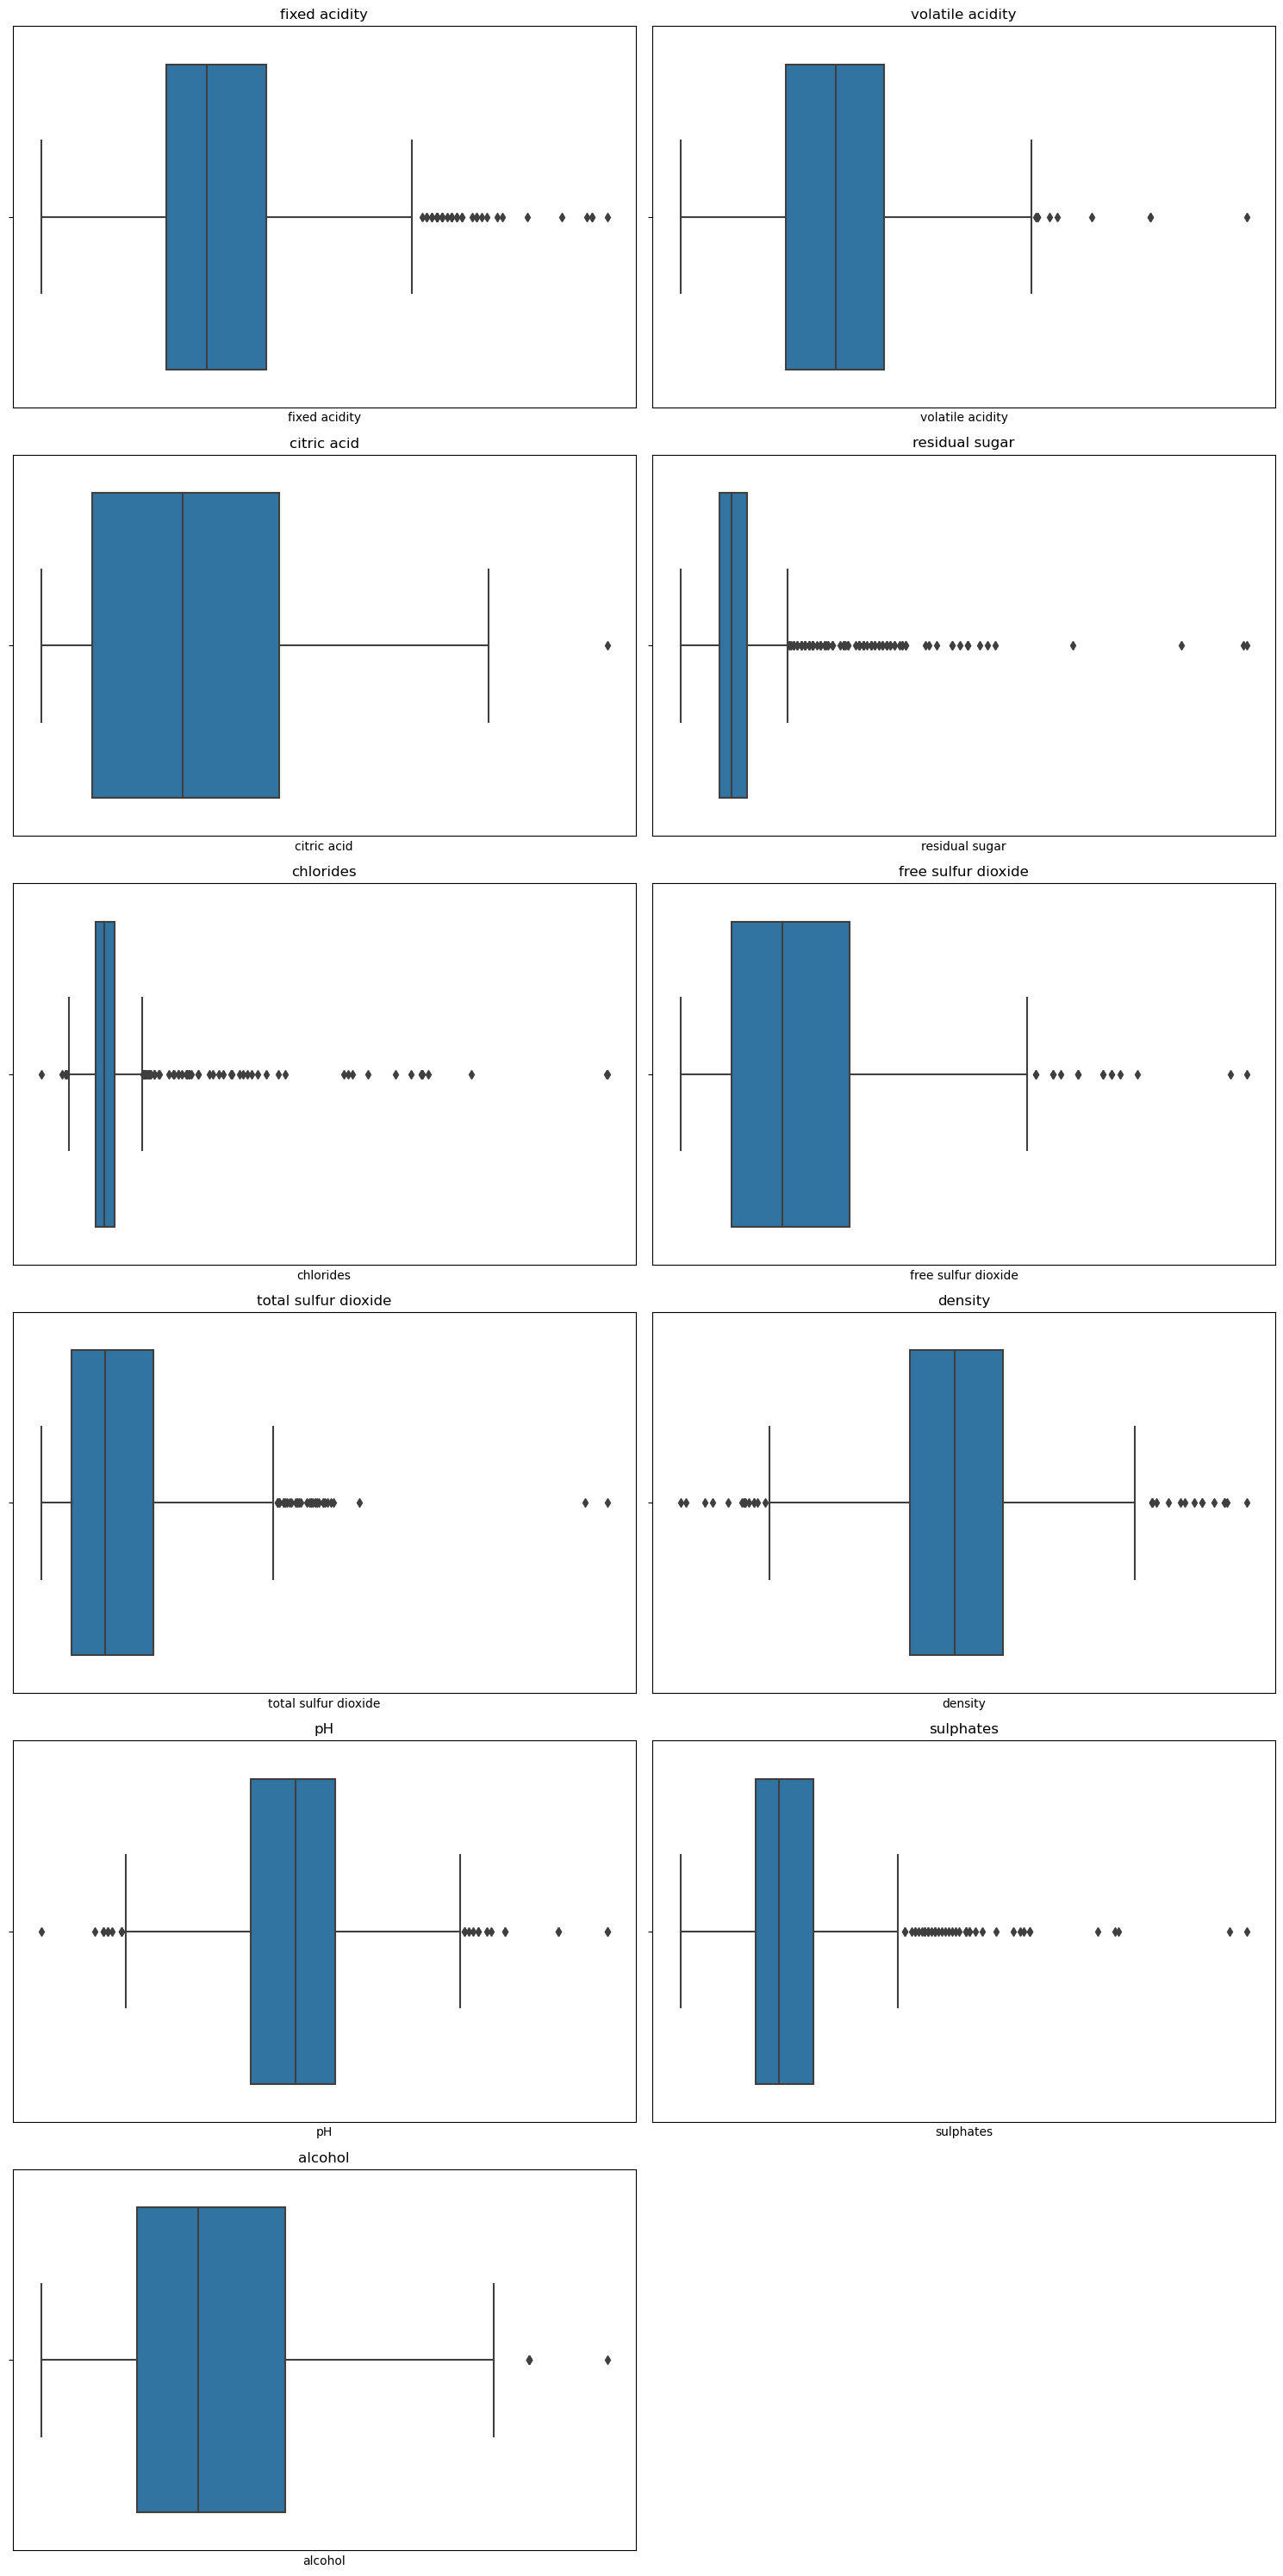

In [15]:
input_columns = df.columns[:-1].tolist() 
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(input_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])
    axes[i].set_xticklabels([])  
    axes[i].tick_params(axis='x', rotation=90)  
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Tukey's Method for identifying outliers and replace them with the mean

In [16]:
input_columns = df.columns[:-1].tolist()
def replace_outliers_with_mean_tukey(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].mean(), data[column])
for column in input_columns:
    if np.issubdtype(df[column].dtype, np.number): 
        replace_outliers_with_mean_tukey(df, column)

Now, df contains the data with outliers replaced by the mean using Tukey's Method


**Check for correlation between variables in the dataset**

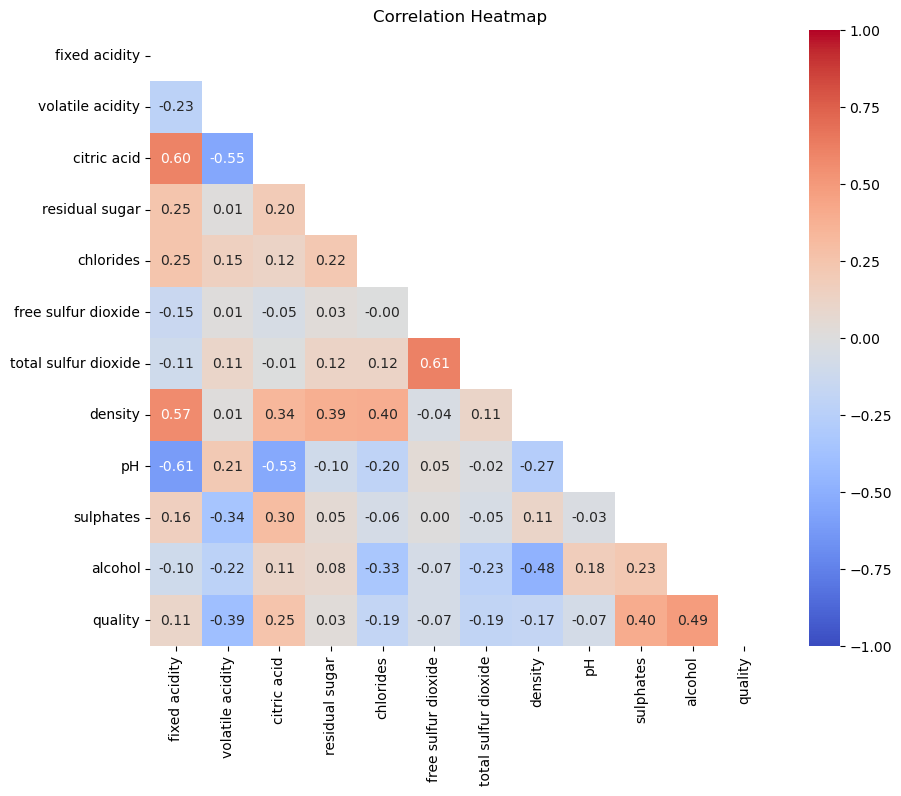

In [17]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There are strong correlations between variables in the dataset. For example, positive correlation between 'fixed acidity' and 'citric acid', a negative correlation between 'fixed acidity' and 'pH'.

I plan to employ tree-based ensemble methods to address the challenges associated with multicollinearity.

**Understand the target variable, quality**

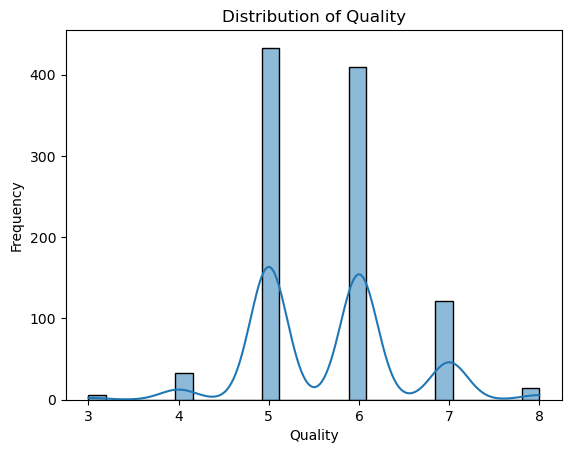

In [18]:
y = df['quality']
sns.histplot(y, kde=True)  
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In the dataset, there are five quality levels ranging from 3 to 8.

The highest quality is represented by the rating 8, while the lowest quality corresponds to the rating 3.

# Defining the goal after EDA

Given that the target variable has distinct levels (quality ratings), this is a multi-classification problem. 

Each quality rating (3 to 8) represents a category, and the goal is to classify or predict the quality level for each instance in your dataset.

Distribution pattern of target

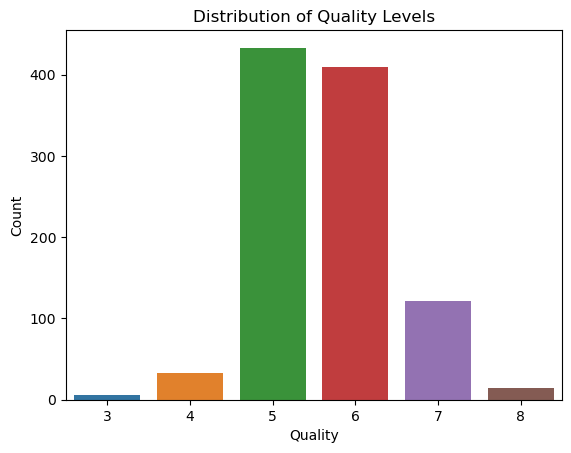

Count of each unique value in 'quality':
quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64


In [19]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
quality_counts = df['quality'].value_counts()
print("Count of each unique value in 'quality':")
print(quality_counts)

SMOTE will be used to address class imbalance.

# Build the Tree-based Models

In [20]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=999)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
classifiers = {'CatBoost Classifier': CatBoostClassifier(verbose=False, random_state=999), 'RF Classifier': RandomForestClassifier(n_estimators=100, random_state=999), 'LightGBM Classifier': LGBMClassifier(n_estimators=100,random_state=999)}
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    rounded_accuracy = round(accuracy, 3)
    print(f'{name} Accuracy: {rounded_accuracy}')

CatBoost Classifier Accuracy: 0.608
RF Classifier Accuracy: 0.536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2804
[LightGBM] [Info] Number of data points in the train set: 2238, number of used features: 11
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classifier Accuracy: 0.569


# Summary

* Among the three tree-based models evaluated, the CatBoost Classifier exhibits the highest accuracy.